In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from tensorflow.keras.utils import to_categorical


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
train_set= pd.read_csv('/content/drive/MyDrive/IP/digit_recognizer/train.csv')
test_set = pd.read_csv('/content/drive/MyDrive/IP/digit_recognizer/test.csv')

In [4]:
print(train_set.shape)
print(test_set.shape)

(42000, 785)
(28000, 784)


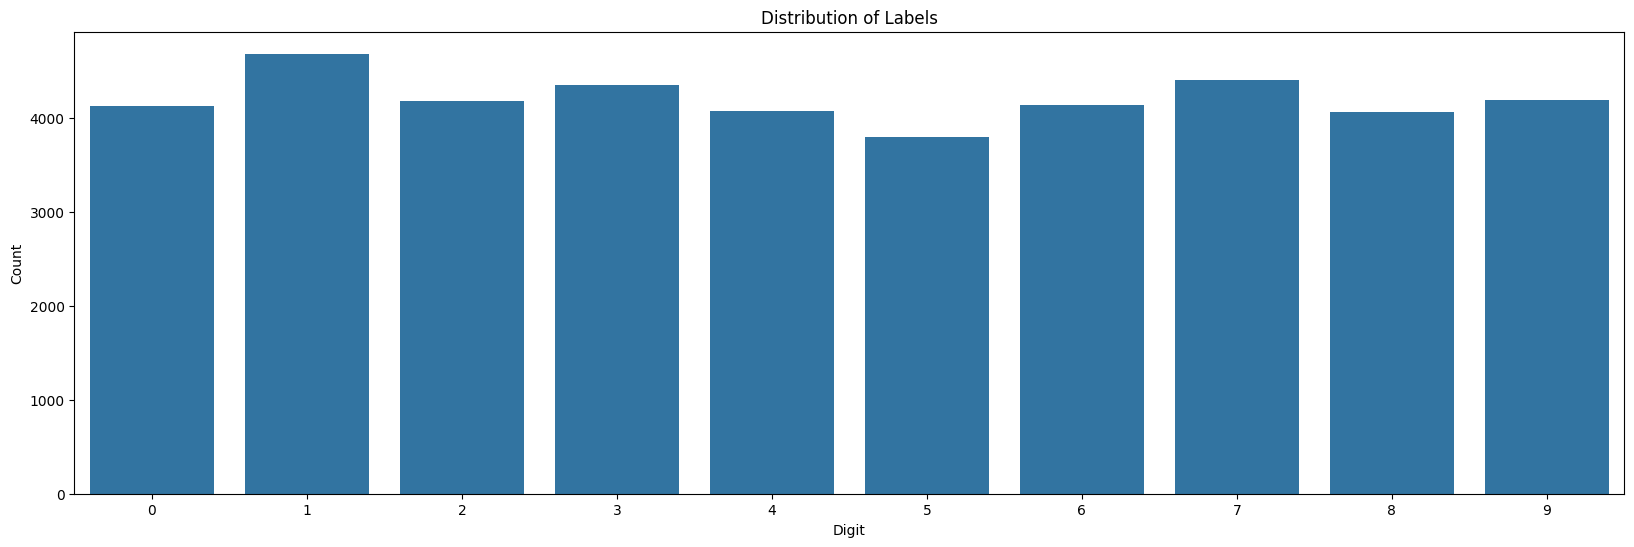

In [15]:
# # Visualize the distribution of the labels
plt.figure(figsize=(20, 6))
# # count plot on single categorical variable
sns.countplot(x ='label', data = train_set)
plt.title('Distribution of Labels')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

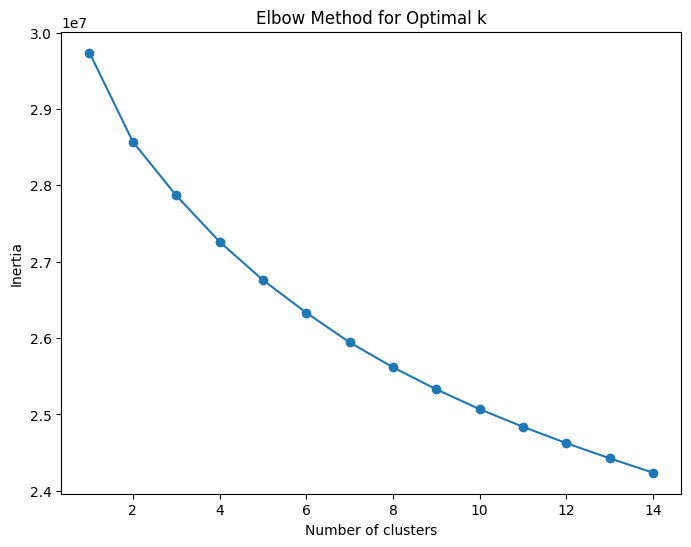

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

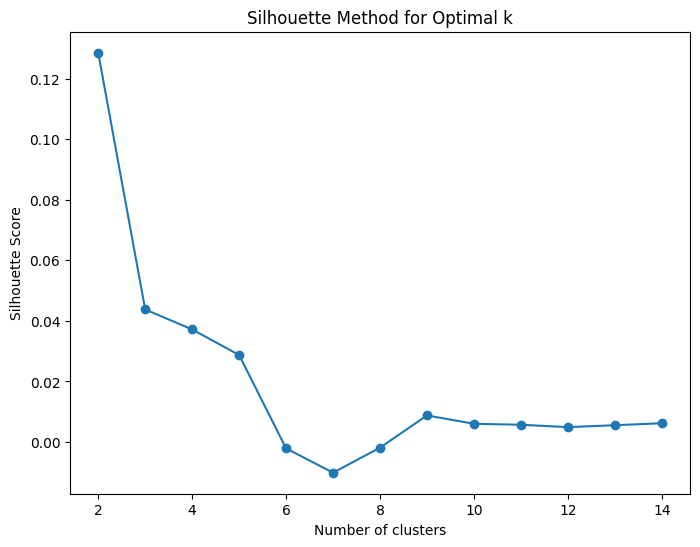

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


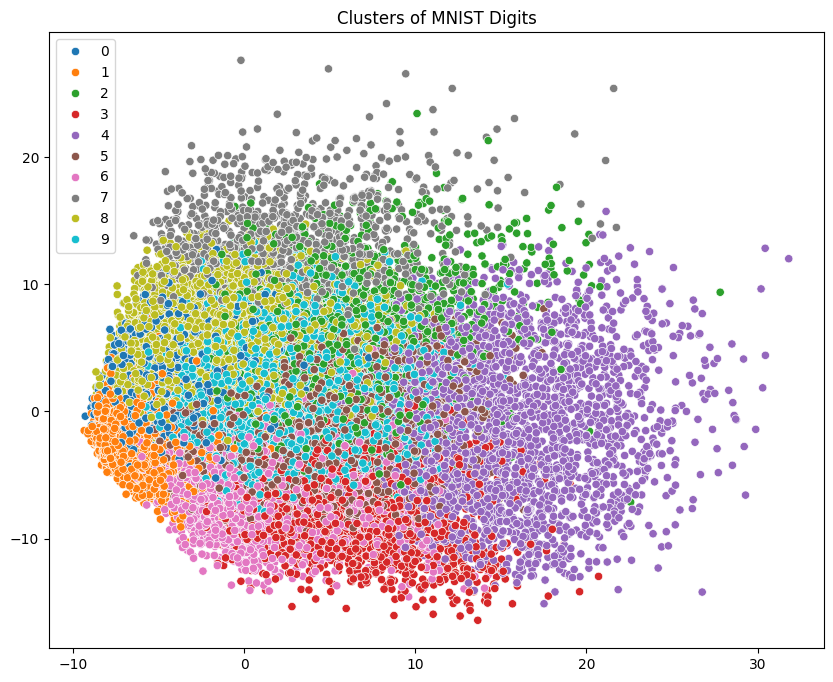

In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/IP/digit_recognizer/train.csv')
X = data.iloc[:, 1:].values # features
y = data.iloc[:, 0].values  # labels

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 15), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Silhouette method
silhouette_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the Silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

# Based on the above plots, choose an appropriate number of clusters
optimal_k = 10  # for example

# Apply K-means with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Visualize the clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='tab10', legend='full')
plt.title('Clusters of MNIST Digits')
plt.show()


In [10]:
# Map clusters to actual digit labels
cluster_labels = [[] for _ in range(optimal_k)]
for i, cluster in enumerate(clusters):
    cluster_labels[cluster].append(y[i])

# Analyze the composition of each cluster
for i in range(optimal_k):
    print(f"Cluster {i}: {np.bincount(cluster_labels[i])}")

# Identify misclassified images
misclassifications = []
for i in range(optimal_k):
    most_common = np.bincount(cluster_labels[i]).argmax()
    for j, label in enumerate(cluster_labels[i]):
        if label != most_common:
            misclassifications.append((i, label, most_common))

print(f"Total Misclassifications: {len(misclassifications)}")



Cluster 0: [   3    3   16   43  329   48    1 2431   82 1360]
Cluster 1: [  17 4546  484  363  317  295  323  306  699  214]
Cluster 2: [  59    8 1378  418   38  140  238    8  104   11]
Cluster 3: [ 283    5 1028  686   11   99    8   12   44    7]
Cluster 4: [2311    0   18    6   37   19  181   12   23   25]
Cluster 5: [ 207   10  593   66   83   65 3200    3   18    3]
Cluster 6: [ 441   97   66   92  623 1599  104   88 1270   96]
Cluster 7: [  5   1  30  78 241  46   4 531  53 305]
Cluster 8: [   5    0   95  116 2390  170   17 1002  202 2086]
Cluster 9: [ 801   14  469 2483    3 1314   61    8 1568   81]
Total Misclassifications: 20103


# MNIST fashion dataset

ANN MODEL

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encoding the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the ANN model
ann_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_ann = ann_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)


4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/20
1500/1500 [==============================] - 11s 6ms/step - loss: 0.5151 - accuracy: 0.8159 - val_loss: 0.4055 - val_accuracy: 0.8533
Epoch 2/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3799 - accuracy: 0.8609 - val_loss: 0.3839 - val_accuracy: 0.8594
Epoch 3/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3433 - accuracy: 0.8727 - val_loss: 0.3473 - val_accuracy: 0.8758
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3164 - accuracy: 0.8831 - val_loss: 0.3617 - val_accuracy: 0.8708
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2966 - accuracy: 0.8901 - val_loss: 0.3370 - val_accuracy: 0.8754
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2822 - accuracy: 0.8941 - val_loss: 0.3359 - val_accuracy: 0.8792
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - l

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4924 - accuracy: 0.8262 - val_loss: 0.4204 - val_accuracy: 0.8468
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3701 - accuracy: 0.8633 - val_loss: 0.4246 - val_accuracy: 0.8376
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3314 - accuracy: 0.8783 - val_loss: 0.3754 - val_accuracy: 0.8640
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3112 - accuracy: 0.8846 - val_loss: 0.3497 - val_accuracy: 0.8756
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2939 - accuracy: 0.8900 - val_loss: 0.3438 - val_accuracy: 0.8778
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2791 - accuracy: 0.8957 - val_loss: 0.3312 - val_accuracy: 0.8775
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2667 - accuracy: 0.9003 - val_loss: 0.3378 - val_accu

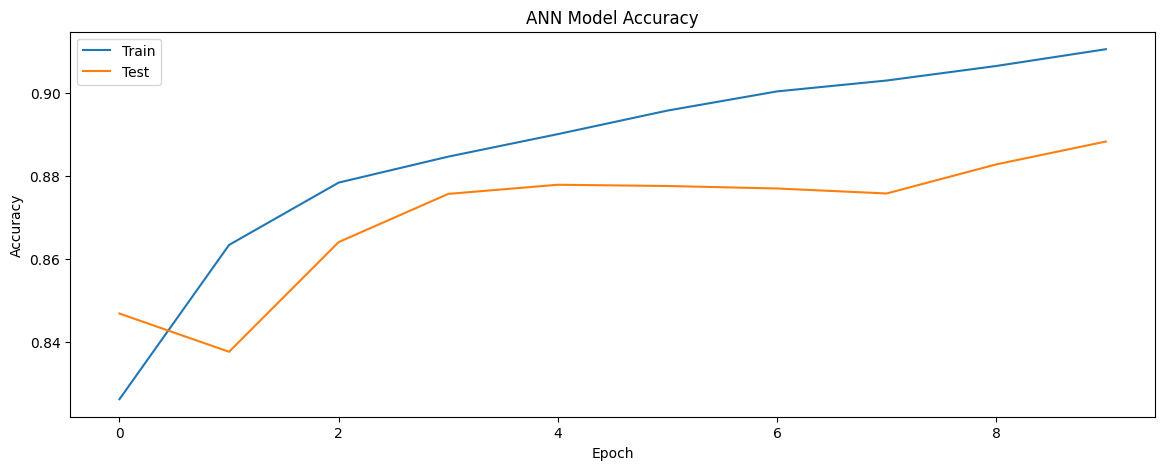

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the data for ANN (flat vectors)
ann_train_images = train_images.reshape((train_images.shape[0], -1))
ann_test_images = test_images.reshape((test_images.shape[0], -1))

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the ANN model
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
ann_history = ann_model.fit(ann_train_images, train_labels, epochs=10, validation_data=(ann_test_images, test_labels))

# Evaluate the ANN model
ann_test_loss, ann_test_accuracy = ann_model.evaluate(ann_test_images, test_labels, verbose=2)
print(f'ANN Test Accuracy: {ann_test_accuracy:.4f}')

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.plot(ann_history.history['accuracy'])
plt.plot(ann_history.history['val_accuracy'])
plt.title('ANN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


CNN MODEL

In [12]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

# Reshape the data for CNN
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_val_cnn = X_val.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_cnn = cnn_model.fit(X_train_cnn, y_train, validation_data=(X_val_cnn, y_val), epochs=20, batch_size=32)



Epoch 1/20
1500/1500 [==============================] - 65s 41ms/step - loss: 0.6001 - accuracy: 0.7826 - val_loss: 0.3944 - val_accuracy: 0.8578
Epoch 2/20
1500/1500 [==============================] - 56s 37ms/step - loss: 0.4033 - accuracy: 0.8559 - val_loss: 0.3332 - val_accuracy: 0.8749
Epoch 3/20
1500/1500 [==============================] - 51s 34ms/step - loss: 0.3492 - accuracy: 0.8753 - val_loss: 0.2902 - val_accuracy: 0.8893
Epoch 4/20
1500/1500 [==============================] - 55s 37ms/step - loss: 0.3168 - accuracy: 0.8857 - val_loss: 0.2692 - val_accuracy: 0.8989
Epoch 5/20
1500/1500 [==============================] - 51s 34ms/step - loss: 0.2876 - accuracy: 0.8955 - val_loss: 0.2579 - val_accuracy: 0.9021
Epoch 6/20
1500/1500 [==============================] - 52s 34ms/step - loss: 0.2657 - accuracy: 0.9018 - val_loss: 0.2492 - val_accuracy: 0.9053
Epoch 7/20
1500/1500 [==============================] - 50s 33ms/step - loss: 0.2481 - accuracy: 0.9089 - val_loss: 0.2561 -

Epoch 1/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.4684 - accuracy: 0.8314 - val_loss: 0.3971 - val_accuracy: 0.8539
Epoch 2/10
1875/1875 [==============================] - 67s 35ms/step - loss: 0.3167 - accuracy: 0.8856 - val_loss: 0.3240 - val_accuracy: 0.8812
Epoch 3/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2691 - accuracy: 0.9018 - val_loss: 0.2881 - val_accuracy: 0.8941
Epoch 4/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2384 - accuracy: 0.9123 - val_loss: 0.2764 - val_accuracy: 0.8976
Epoch 5/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.2136 - accuracy: 0.9207 - val_loss: 0.2696 - val_accuracy: 0.9011
Epoch 6/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.1931 - accuracy: 0.9281 - val_loss: 0.2645 - val_accuracy: 0.9051
Epoch 7/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.1745 - accuracy: 0.9345 - val_loss: 0.2702 -

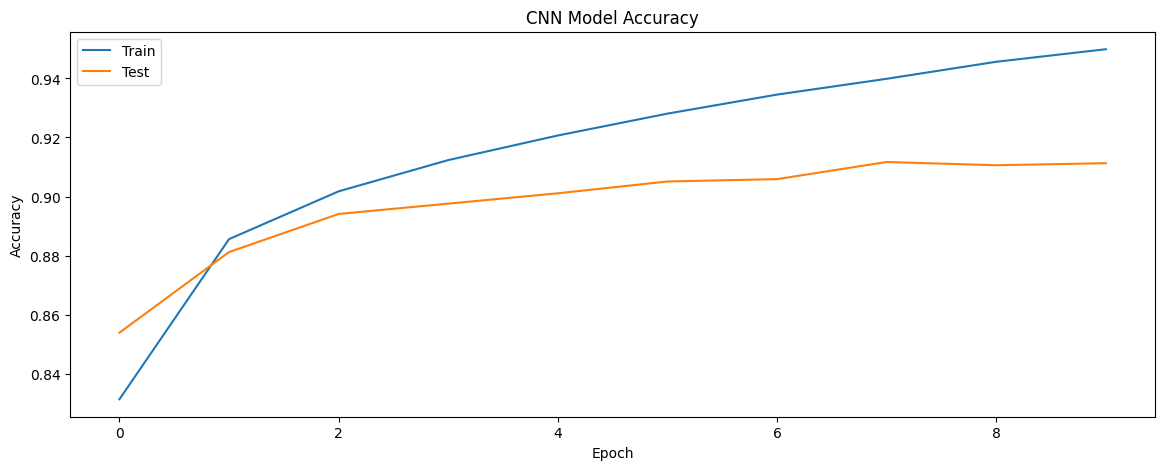

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the data for CNN (28x28x1)
cnn_train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
cnn_test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_history = cnn_model.fit(cnn_train_images, train_labels, epochs=10, validation_data=(cnn_test_images, test_labels))

# Evaluate the CNN model
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(cnn_test_images, test_labels, verbose=2)
print(f'CNN Test Accuracy: {cnn_test_accuracy:.4f}')

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


LAYER VISUALIZATION

1/1 [==============================] - 0s 98ms/step


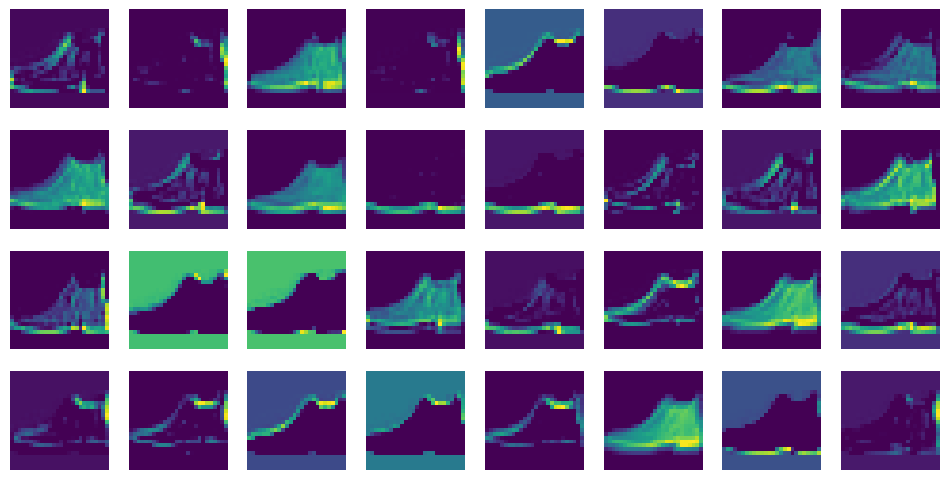

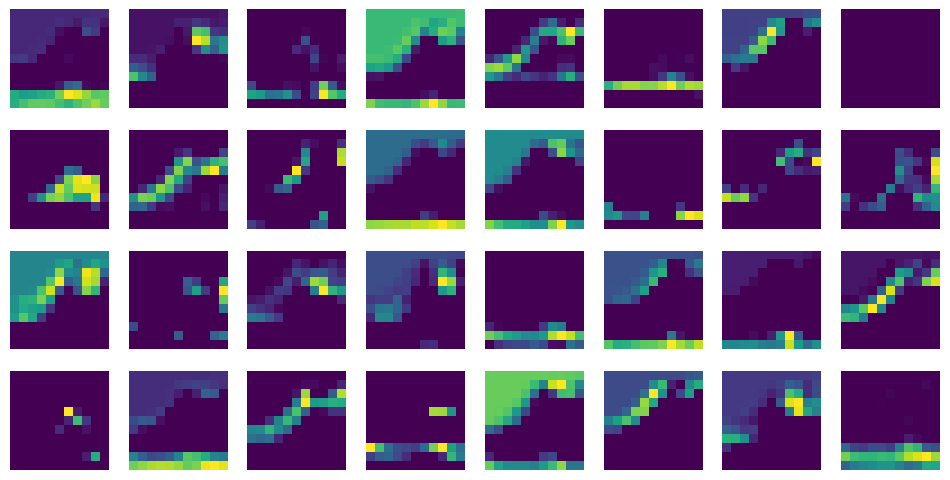

In [24]:
from tensorflow.keras.models import Model
import numpy as np

# Define a model that outputs the activations from each layer
layer_outputs = [layer.output for layer in cnn_model.layers]
activation_model = Model(inputs=cnn_model.input, outputs=layer_outputs)

# Get the activations for a sample input
sample_image = X_test_cnn[0].reshape(1, 28, 28, 1)
activations = activation_model.predict(sample_image)

# Plot the activations of the first convolutional layer
first_layer_activation = activations[0]

fig, axes = plt.subplots(4, 8, figsize=(12, 6))
for i in range(32):
    ax = axes[i // 8, i % 8]
    ax.matshow(first_layer_activation[0, :, :, i], cmap='viridis')
    ax.axis('off')

plt.show()

second_layer_activation = activations[2]

fig, axes = plt.subplots(4, 8, figsize=(12, 6))
for i in range(32):
    ax = axes[i // 8, i % 8]
    ax.matshow(second_layer_activation[0, :, :, i], cmap='viridis')
    ax.axis('off')

plt.show()

1/1 [==============================] - 0s 86ms/step


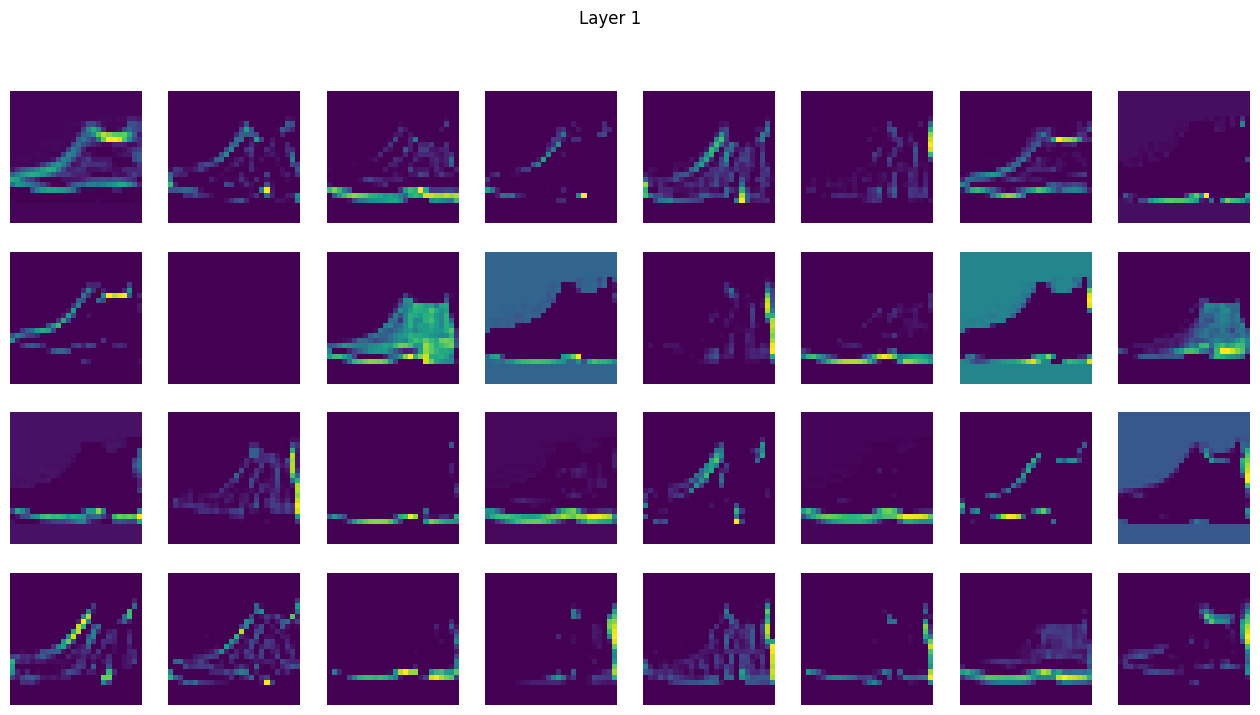

Layer 1: Simple features like edges and textures.


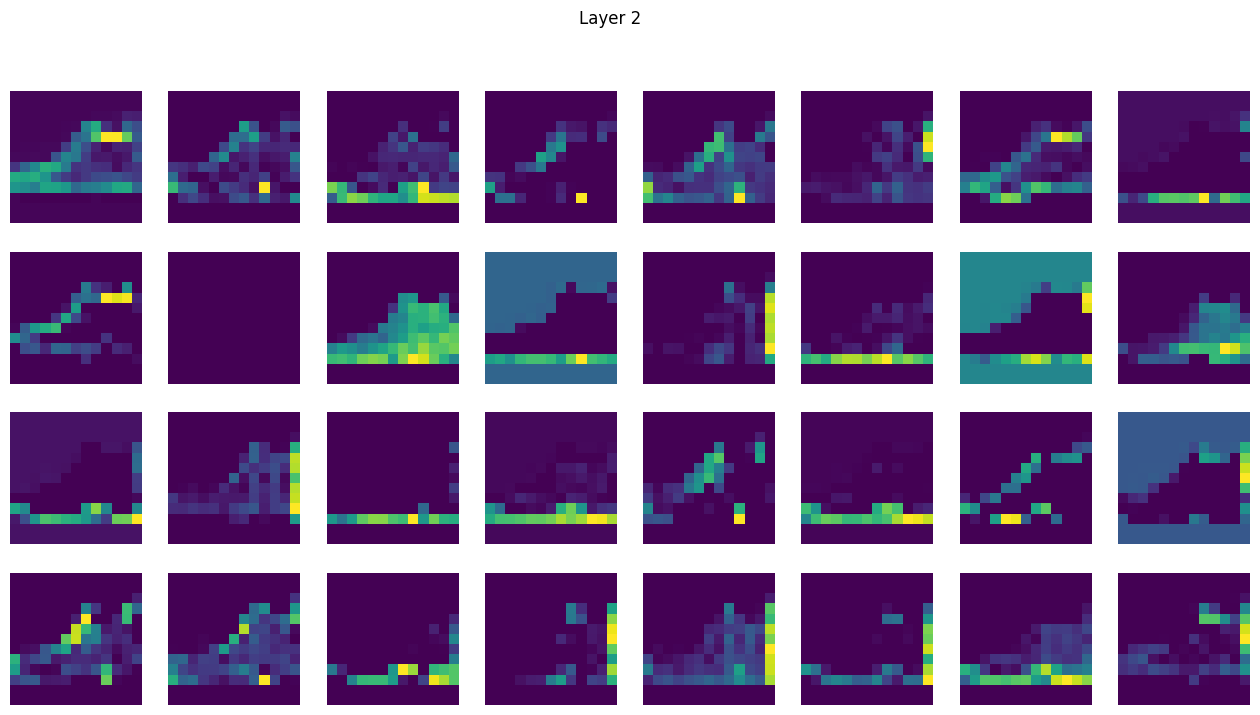

Layer 2: Combinations of simple features, forming more complex patterns.


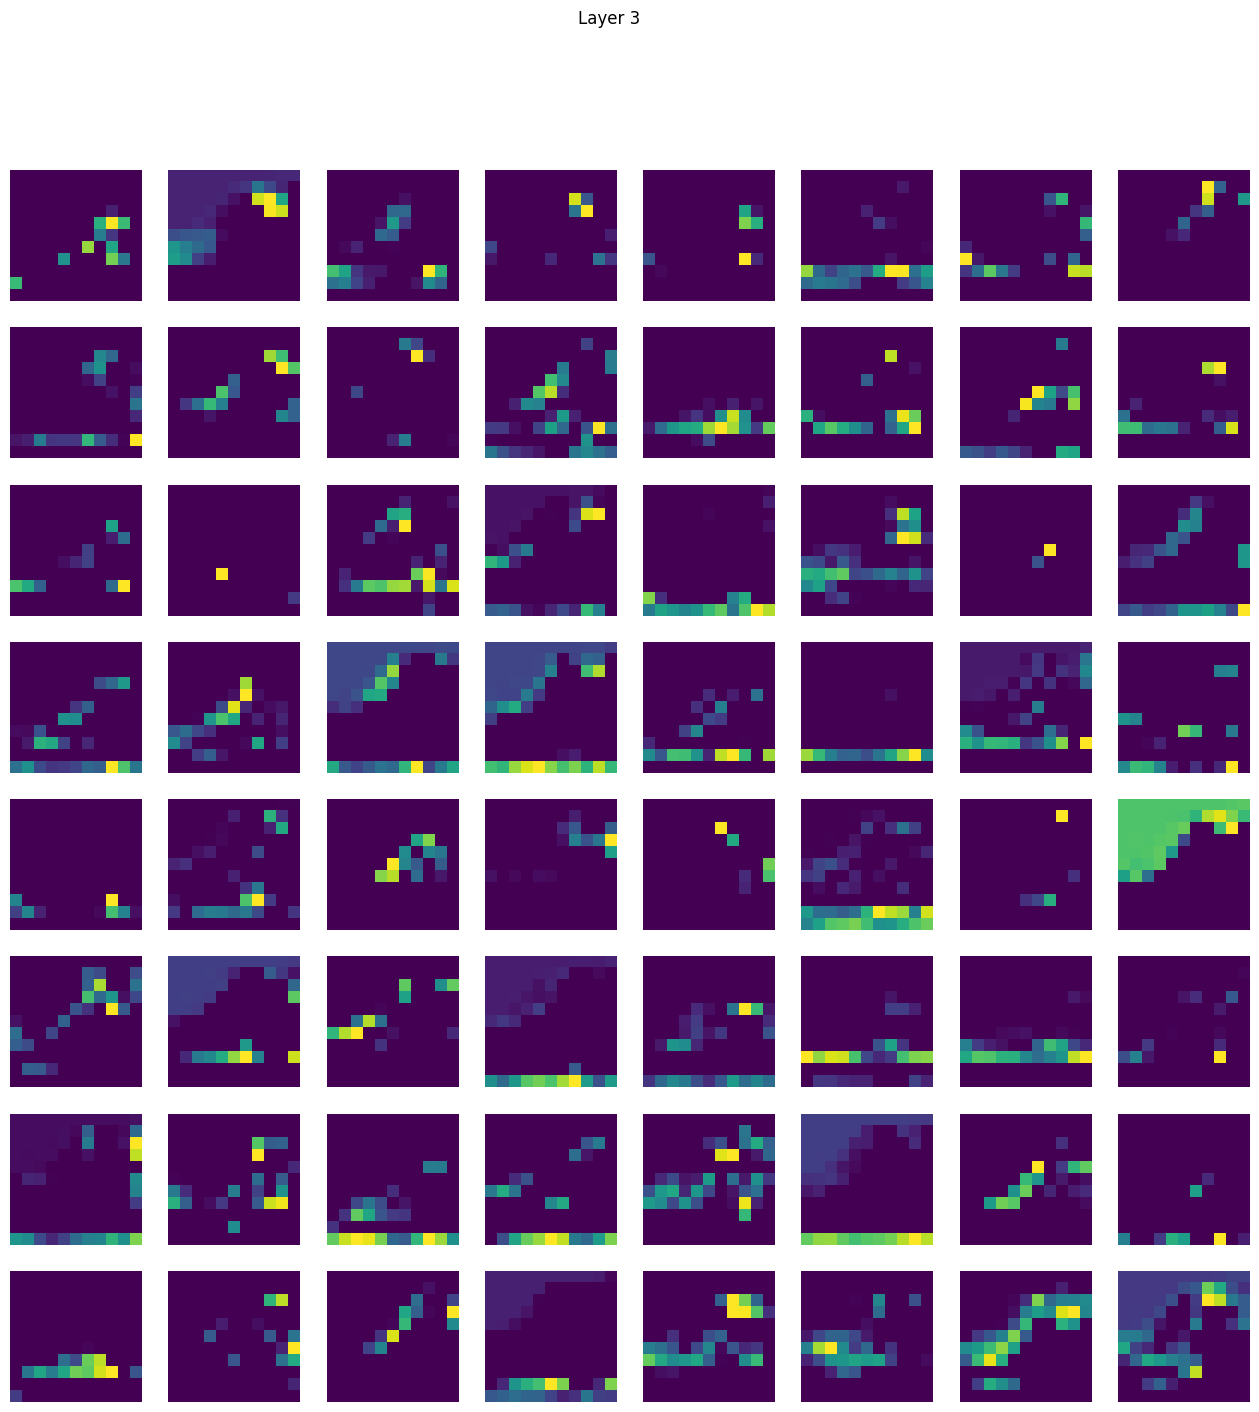

Layer 3: High-level abstractions, capturing intricate details and parts of objects.


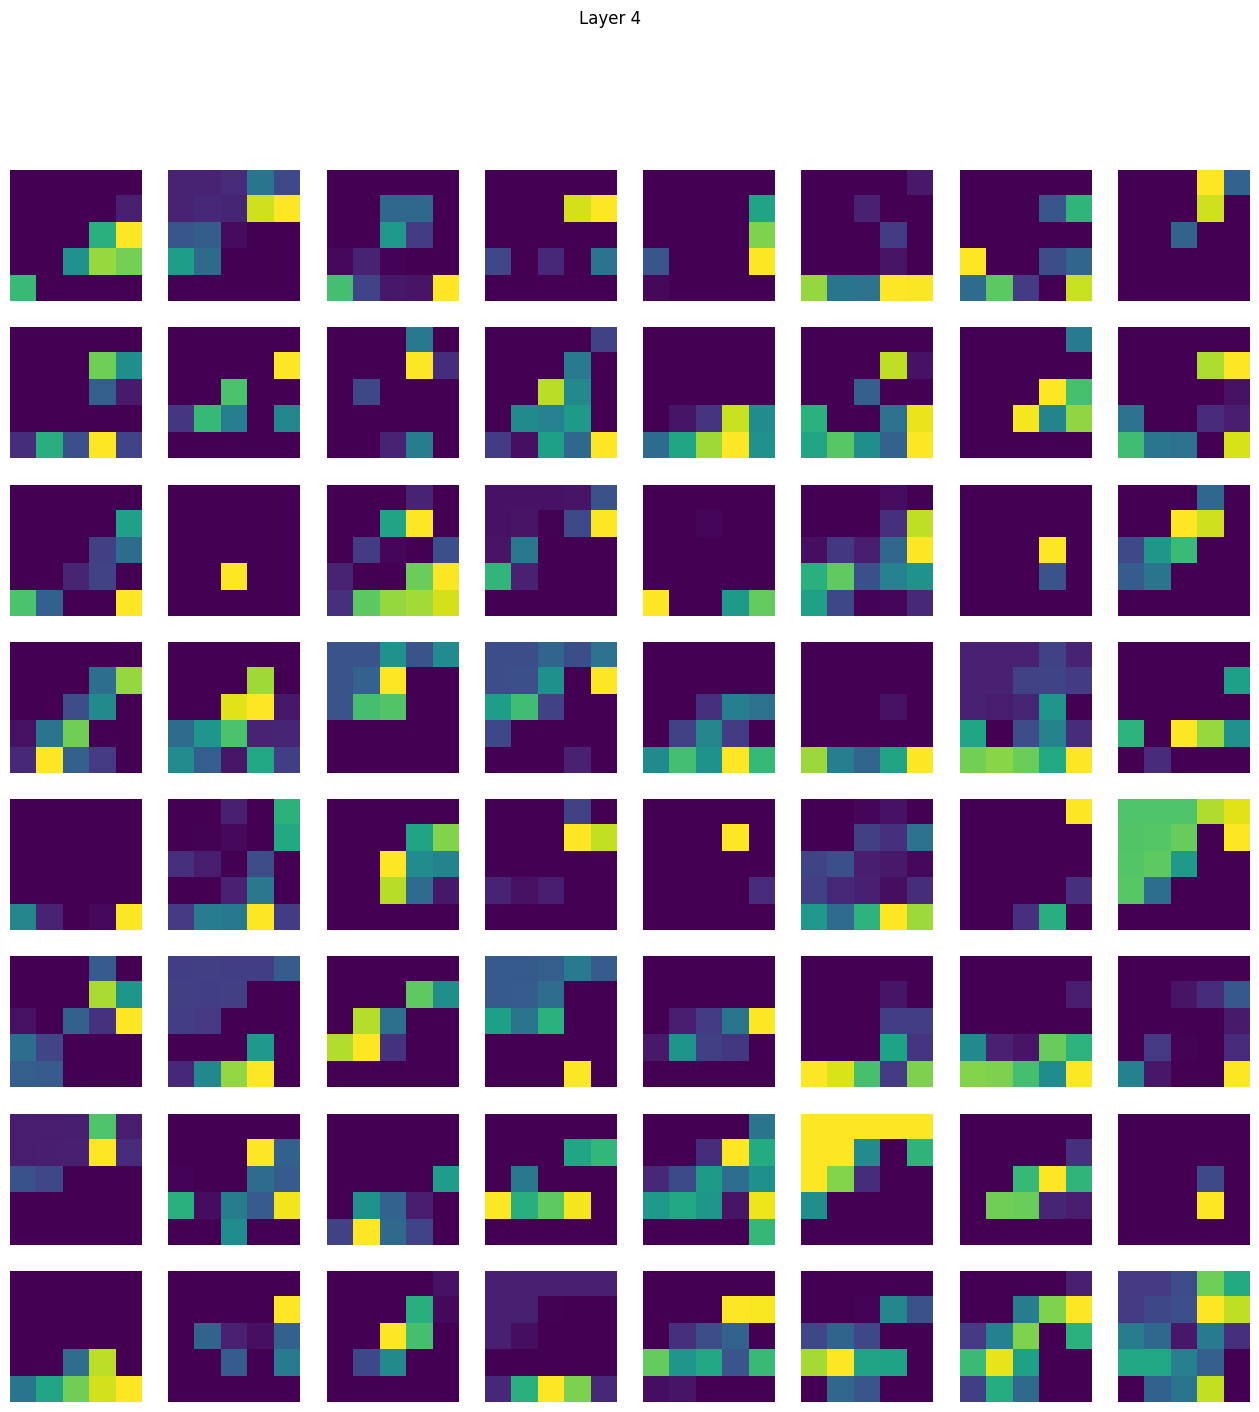

Layer 4: High-level abstractions, capturing intricate details and parts of objects.


IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

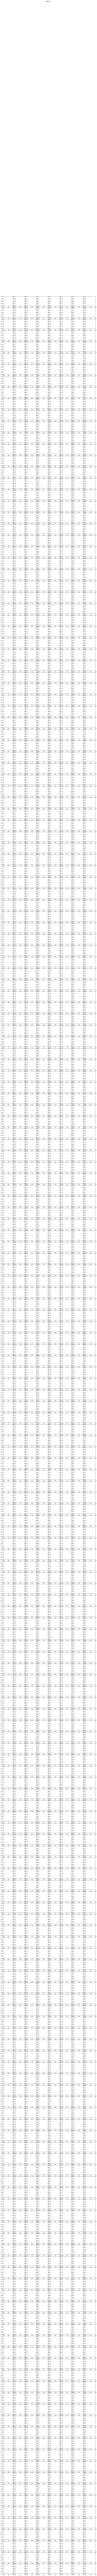

In [27]:
# Assume that the model and data loading code is already provided as before

# Create a model that outputs the activations of each layer
layer_outputs = [layer.output for layer in cnn_model.layers]
activation_model = Model(inputs=cnn_model.input, outputs=layer_outputs)

# Pick a test image
test_image = test_images[0].reshape(1, 28, 28, 1)

# Get the activations
activations = activation_model.predict(test_image)

# Function to visualize activations
def display_activations(activations, col_size, row_size, layer_index):
    activation = activations[layer_index]
    num_filters = activation.shape[-1]
    fig, ax = plt.subplots(row_size, col_size, figsize=(col_size*2, row_size*2))
    fig.suptitle(f'Layer {layer_index + 1}')
    for i in range(row_size * col_size):
        if i < num_filters:
            ax[i // col_size, i % col_size].imshow(activation[0, :, :, i], cmap='viridis')
            ax[i // col_size, i % col_size].axis('off')
    plt.show()

# Visualize activations for each layer and interpret the patterns
for i in range(len(activations)):
    num_filters = activations[i].shape[-1]
    display_activations(activations, col_size=min(num_filters, 8), row_size=(num_filters + 7) // 8, layer_index=i)

    # Provide insights on the complexity of patterns recognized by each layer
    if i == 0:
        print("Layer 1: Simple features like edges and textures.")
    elif i == 1:
        print("Layer 2: Combinations of simple features, forming more complex patterns.")
    else:
        print(f"Layer {i + 1}: High-level abstractions, capturing intricate details and parts of objects.")

# Discuss the change in complexity of patterns recognized by layers with the depth of the network
print("As we move deeper into the network:")
print("- The early layers detect basic features like edges and textures.")
print("- Intermediate layers combine these features into more complex patterns.")
print("- Deeper layers recognize high-level abstractions and detailed parts of objects.")
